In [85]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [86]:

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os


***
<h1><div style="text-align: center">Hotel Review</div></h1>


<h2>Acquire data</h2>

In [3]:
print(color.BOLD+color.PURPLE+'Preview of the sample data :')
#Reading train and test data 

df1=pd.read_csv('cleaned_data.csv')
df1.head()

Preview of the sample data :


,Hotel_ID,average_stars,review_count,compliment_food,compliment_stay,compliment_service,compliment_staff,compliment_ambience,compliment_hygenie,compliment_safety,...,location,fans,funny,rev_length,rev_stars,rev_use,friend_count,friend_label,rev_count_label,Faker
0,0,4.67,8,0,0,0,0,0,0,0,...,0,0,0,520,5,3,9,1,1,1
1,1,1.00,1,0,0,0,0,0,0,0,...,0,0,0,823,1,2,0,0,0,1
2,2,1.67,2,0,0,0,0,0,0,0,...,0,0,0,240,3,1,0,0,1,1
3,3,3.00,2,0,0,0,0,0,0,0,...,1,0,0,174,4,0,0,0,1,1
4,4,3.73,48,1,0,1,2,0,0,1,...,2,3,6,1511,3,0,261,3,2,1


In [4]:
print(color.BOLD+color.PURPLE+'Dataset has',df1.shape[0],'rows and',df1.shape[1],'columns.')

Dataset has 200 rows and 22 columns.


<h2> Data Inspection </h2>

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel_ID              200 non-null    int64  
 1   average_stars         200 non-null    float64
 2   review_count          200 non-null    int64  
 3   compliment_food       200 non-null    int64  
 4   compliment_stay       200 non-null    int64  
 5   compliment_service    200 non-null    int64  
 6   compliment_staff      200 non-null    int64  
 7   compliment_ambience   200 non-null    int64  
 8   compliment_hygenie    200 non-null    int64  
 9   compliment_safety     200 non-null    int64  
 10  compliment_nature     200 non-null    int64  
 11  compliment_transport  200 non-null    int64  
 12  location              200 non-null    int64  
 13  fans                  200 non-null    int64  
 14  funny                 200 non-null    int64  
 15  rev_length            2

In [7]:
#Reading unique values in non-numeric columns
print(color.BOLD+color.PURPLE+"Unique values in categorical features of dataset :\n")
for column in df1:
    print(color.BOLD+color.DARKCYAN,df1[column].value_counts().sort_values())
    print('\n')

Unique values in categorical features of dataset :

 199    1
176    1
197    1
196    1
195    1
      ..
4      1
3      1
2      1
12     1
0      1
Name: Hotel_ID, Length: 200, dtype: int64


 2.07     1
3.90     1
4.39     1
3.79     1
4.28     1
        ..
4.00     6
2.00     8
1.00    16
3.00    19
5.00    58
Name: average_stars, Length: 75, dtype: int64


 18      1
62      1
50      1
48      1
34      1
29      1
27      1
24      1
22      1
21      1
20      1
109     1
16      1
154     1
12      1
76      1
13      2
9       2
23      2
14      3
47      3
19      4
8       4
11      6
10      7
6       7
7      11
5      12
4      15
3      18
2      36
1      52
Name: review_count, dtype: int64


 8      1
7      1
6      1
3      1
2      2
1      6
0    188
Name: compliment_food, dtype: int64


 0    200
Name: compliment_stay, dtype: int64


 8      1
7      1
6      1
3      1
2      2
1      6
0    188
Name: compliment_service, dtype: int64


 4      1
3      1
1   

In [8]:
def null_table(data):
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame


In [9]:
print(color.BOLD+color.PURPLE+"Missing values in dataset :\n")


Missing values in dataset :



In [10]:
null_frame_train = null_table(df1)
null_frame_train=null_frame_train[null_frame_train['Approximate Percentage of Null Values'] >0]
null_frame_train.sort_values(by='Approximate Percentage of Null Values',ascending=False)


,Columns,Count of Null Values,Approximate Percentage of Null Values


In [11]:
print(color.BOLD+color.PURPLE+"Duplicate check on dataset :\n")
duplicateRowsDF = df1[df1.duplicated()]
duplicateRowsDF.sum()

Duplicate check on dataset :



Hotel_ID                0.0
average_stars           0.0
review_count            0.0
compliment_food         0.0
compliment_stay         0.0
compliment_service      0.0
compliment_staff        0.0
compliment_ambience     0.0
compliment_hygenie      0.0
compliment_safety       0.0
compliment_nature       0.0
compliment_transport    0.0
location                0.0
fans                    0.0
funny                   0.0
rev_length              0.0
rev_stars               0.0
rev_use                 0.0
friend_count            0.0
friend_label            0.0
rev_count_label         0.0
Faker                   0.0
dtype: float64

In [12]:
print(color.BOLD+color.PURPLE+'Summary of the cleaned data set to be used for furthure analysis :')
df1.describe(include="all").T

Summary of the cleaned data set to be used for furthure analysis :


,count,mean,std,min,25%,50%,75%,max
Hotel_ID,200.0,99.5000,57.879185,0.0,49.75,99.500,149.25,199.0
average_stars,200.0,3.6888,1.253741,1.0,3.00,3.915,5.00,5.0
review_count,200.0,8.2800,16.662225,1.0,1.00,3.000,7.00,154.0
compliment_food,200.0,0.1700,0.913935,0.0,0.00,0.000,0.00,8.0
compliment_stay,200.0,0.0000,0.000000,0.0,0.00,0.000,0.00,0.0
compliment_service,200.0,0.1700,0.913935,0.0,0.00,0.000,0.00,8.0
compliment_staff,200.0,0.0800,0.452353,0.0,0.00,0.000,0.00,4.0
compliment_ambience,200.0,0.0000,0.000000,0.0,0.00,0.000,0.00,0.0
compliment_hygenie,200.0,0.0350,0.306995,0.0,0.00,0.000,0.00,4.0
compliment_safety,200.0,0.1500,0.787784,0.0,0.00,0.000,0.00,9.0


In [13]:
df1.drop('Hotel_ID',axis=1,inplace=True)

# Exploratory Data Analysis

<h2> Data Distribution </h2>

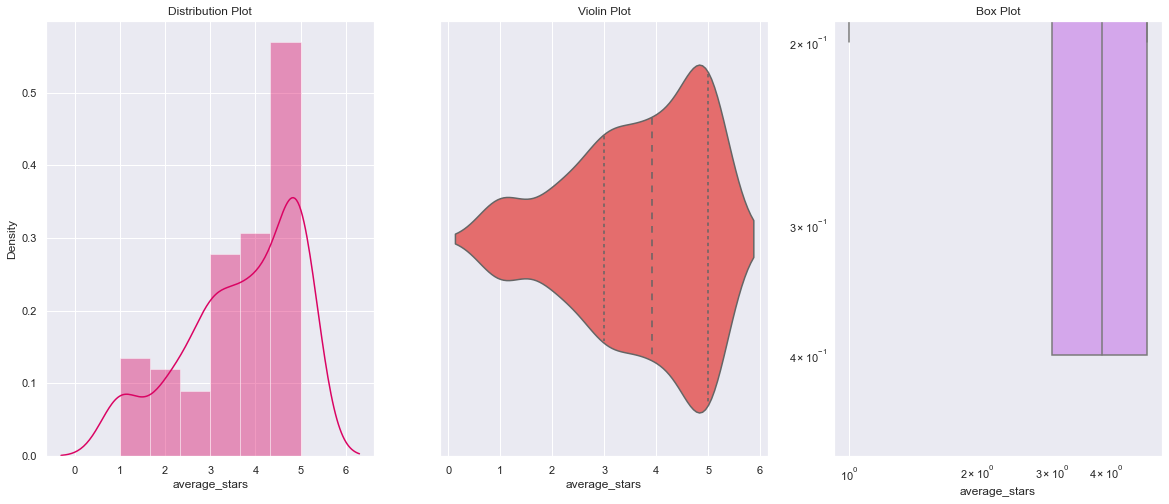

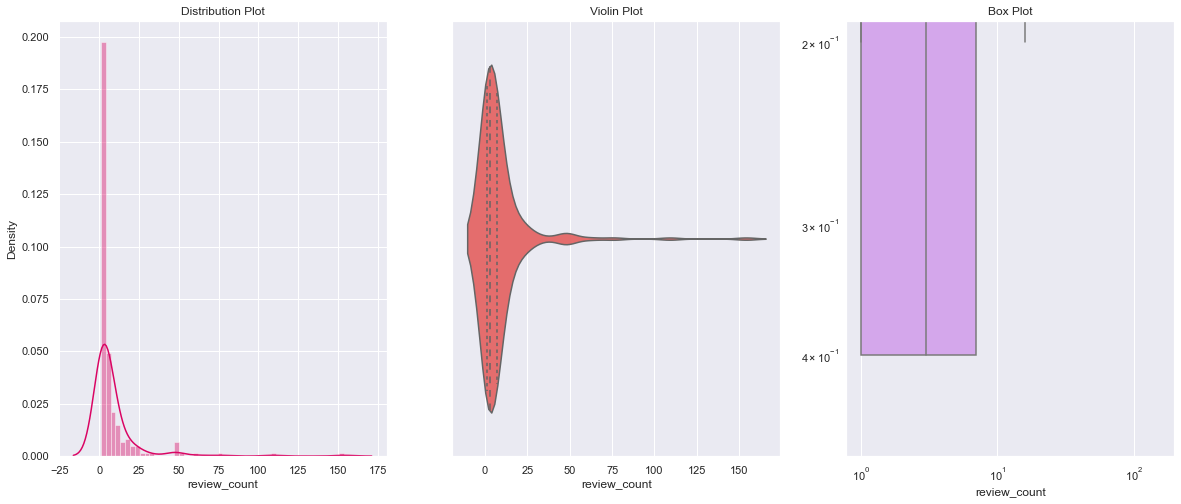

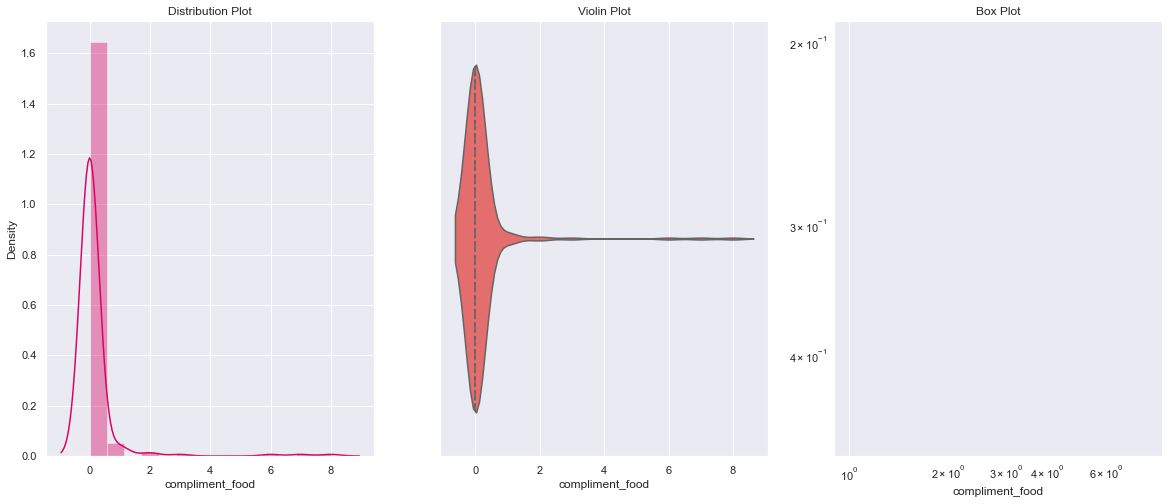

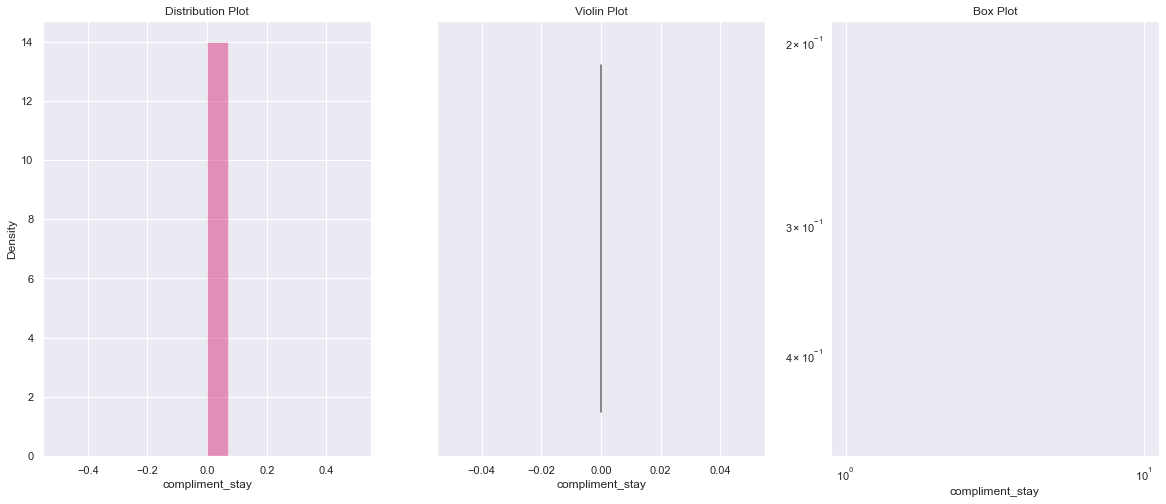

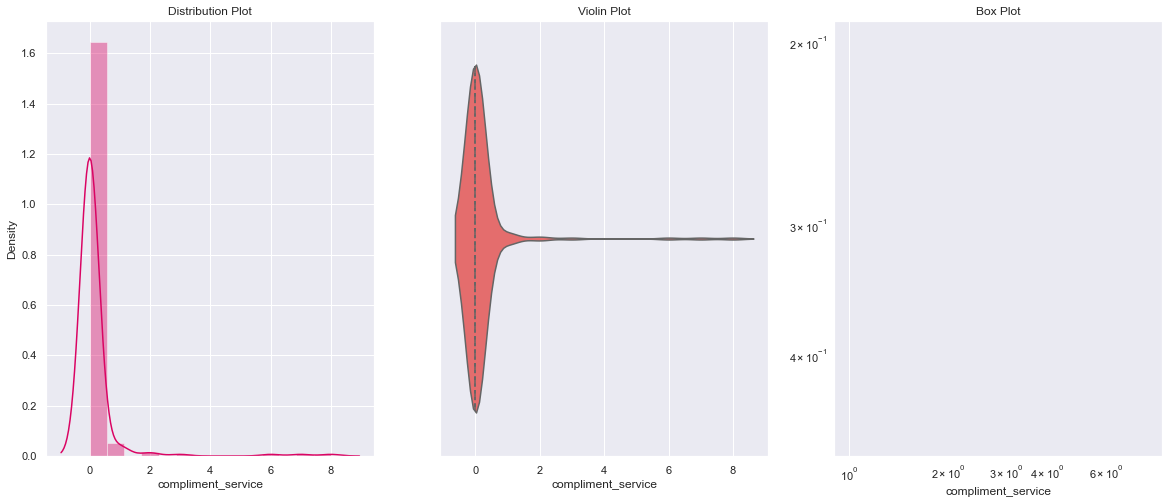

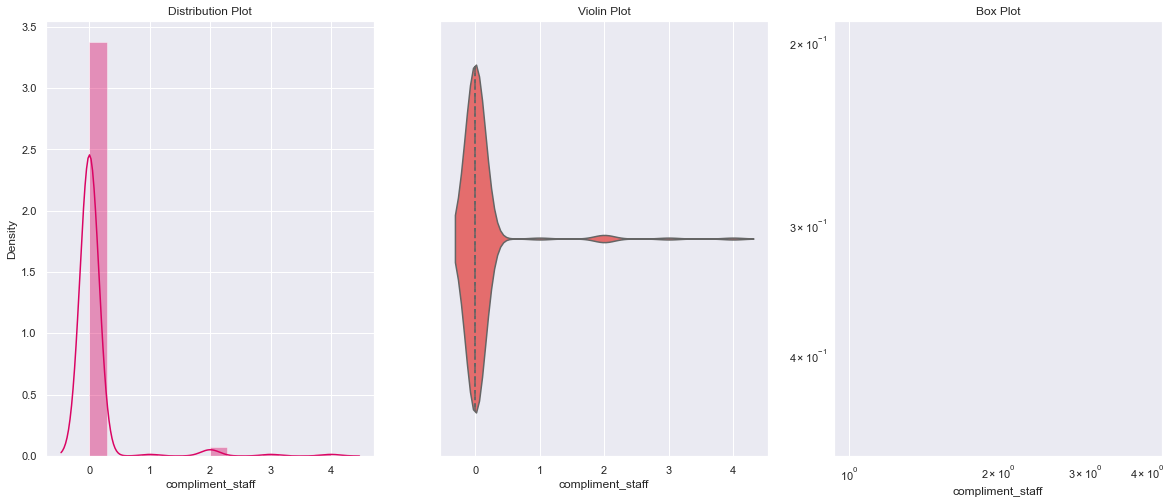

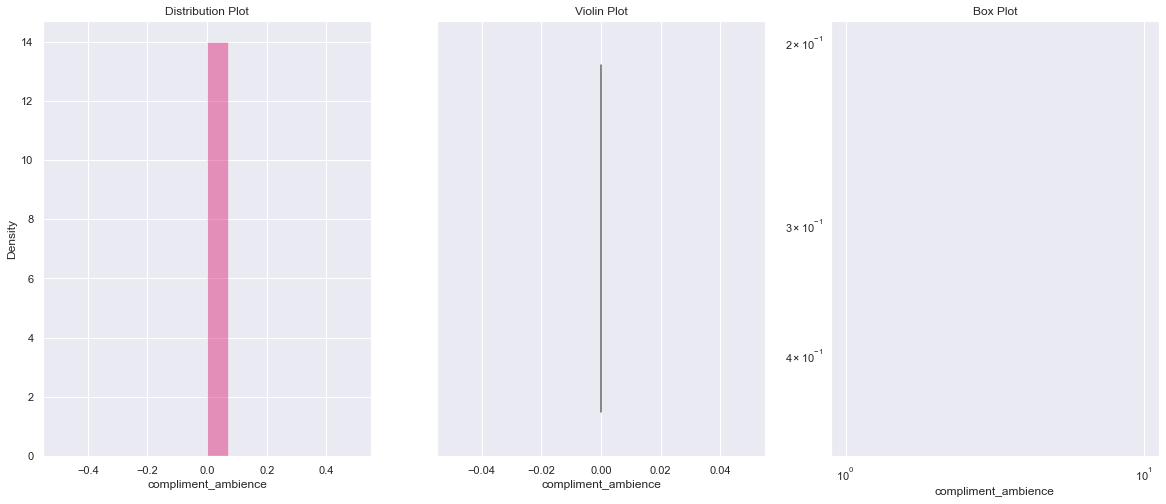

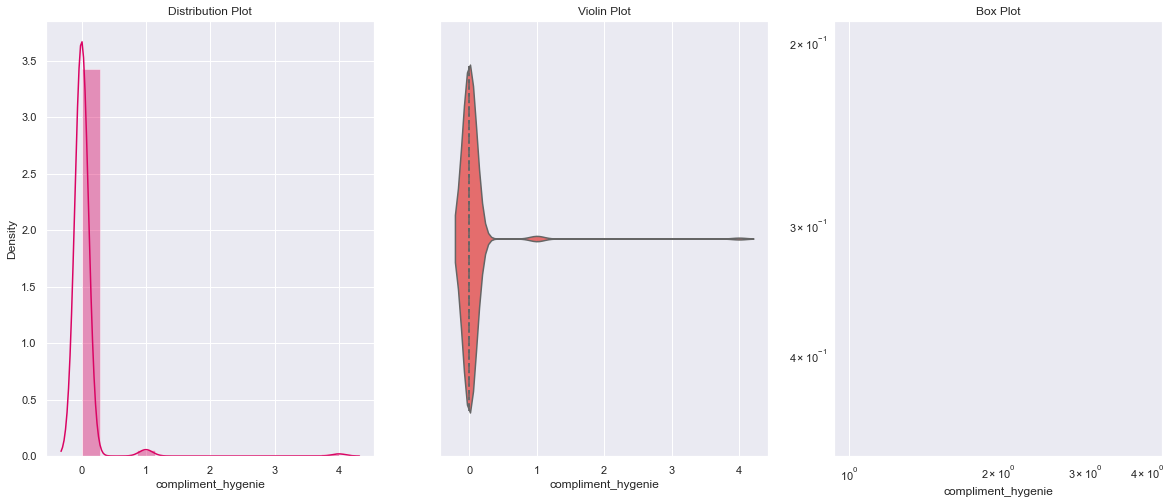

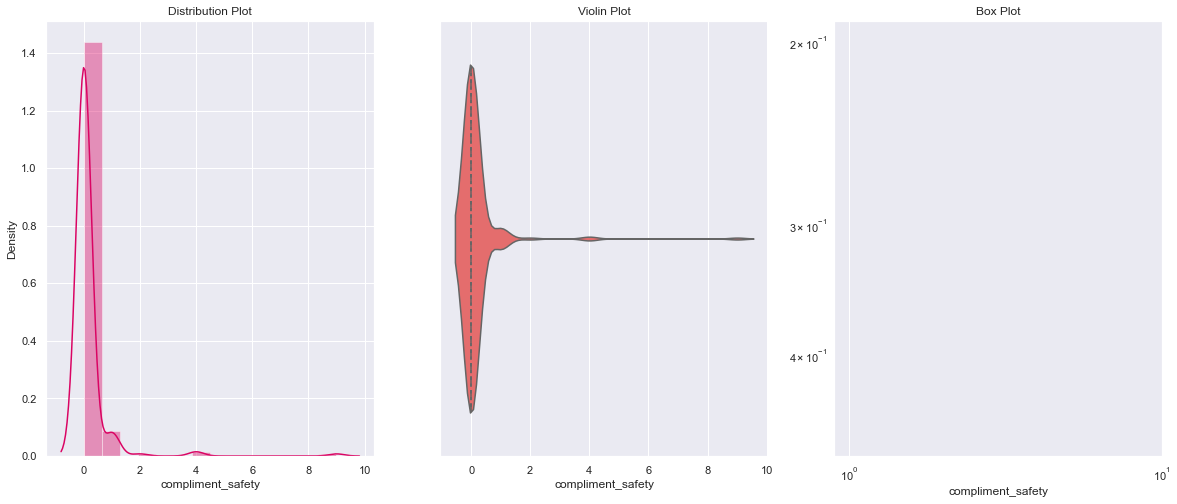

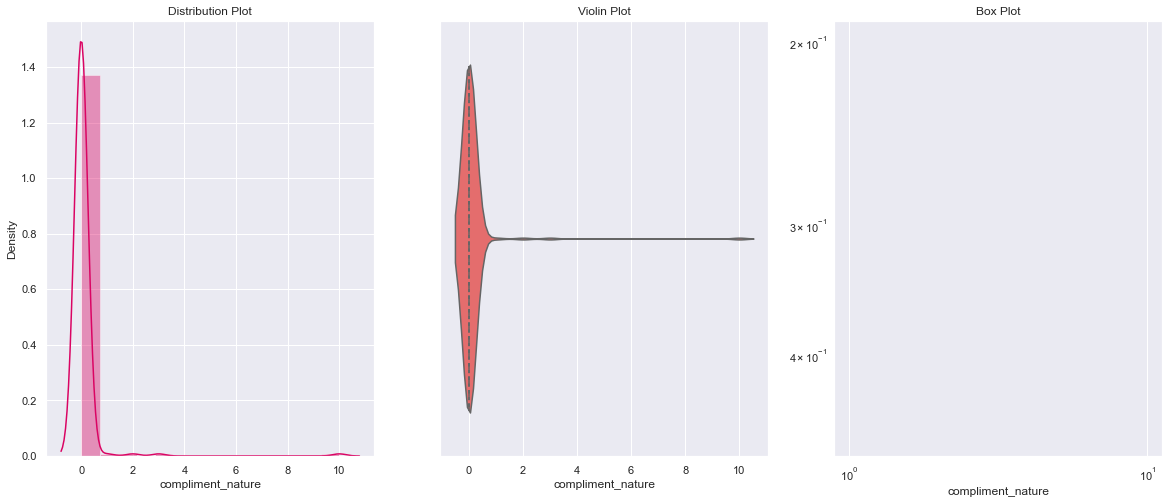

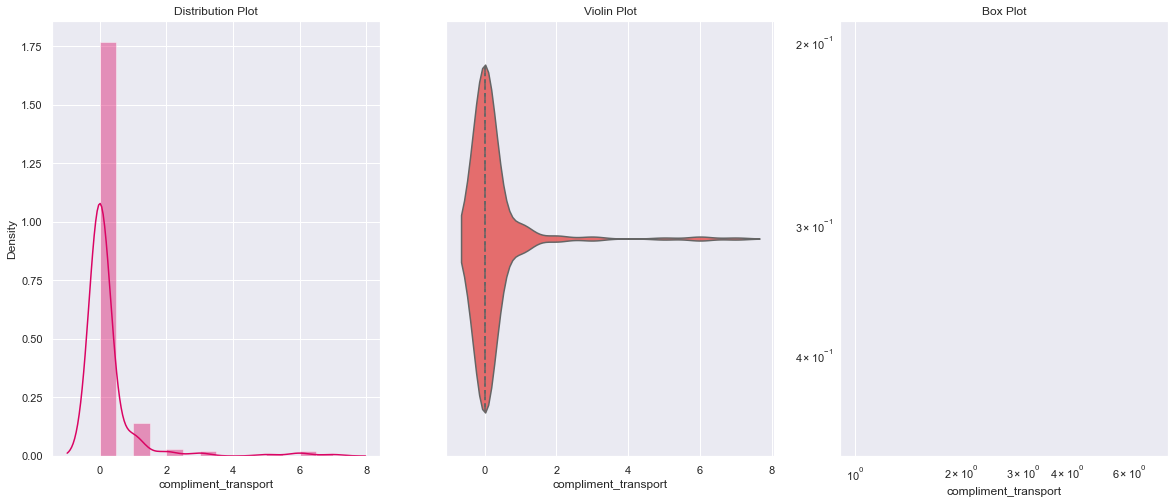

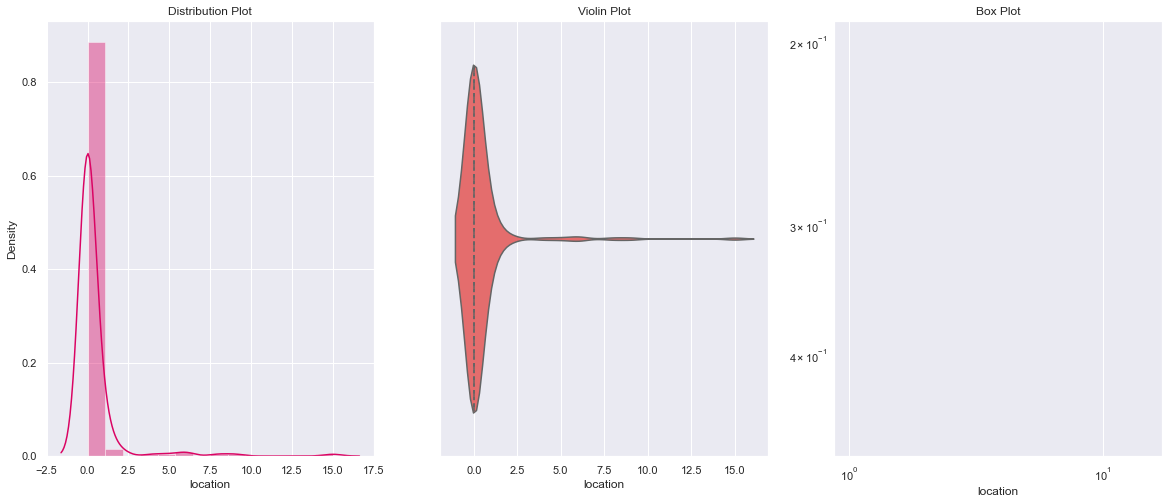

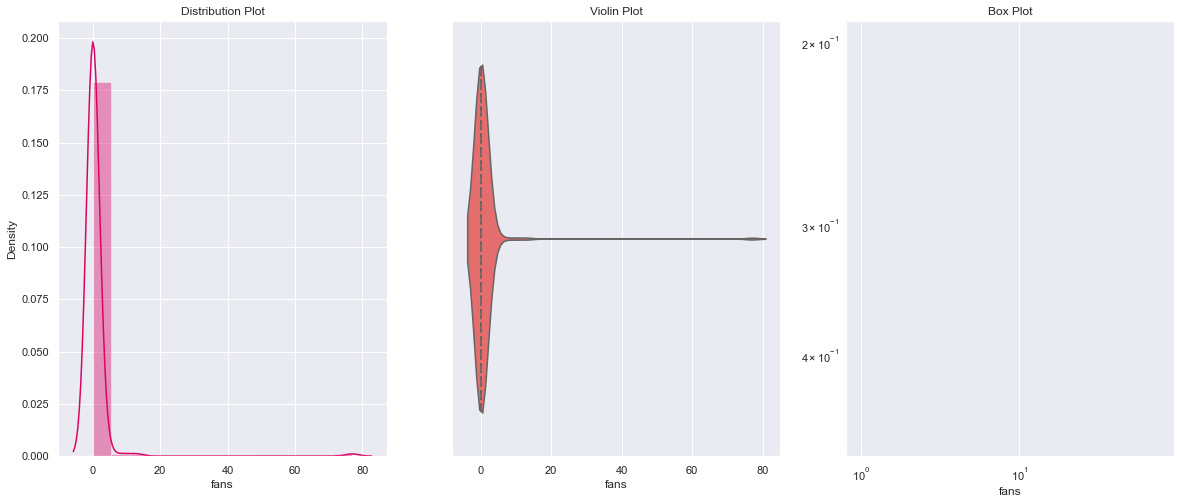

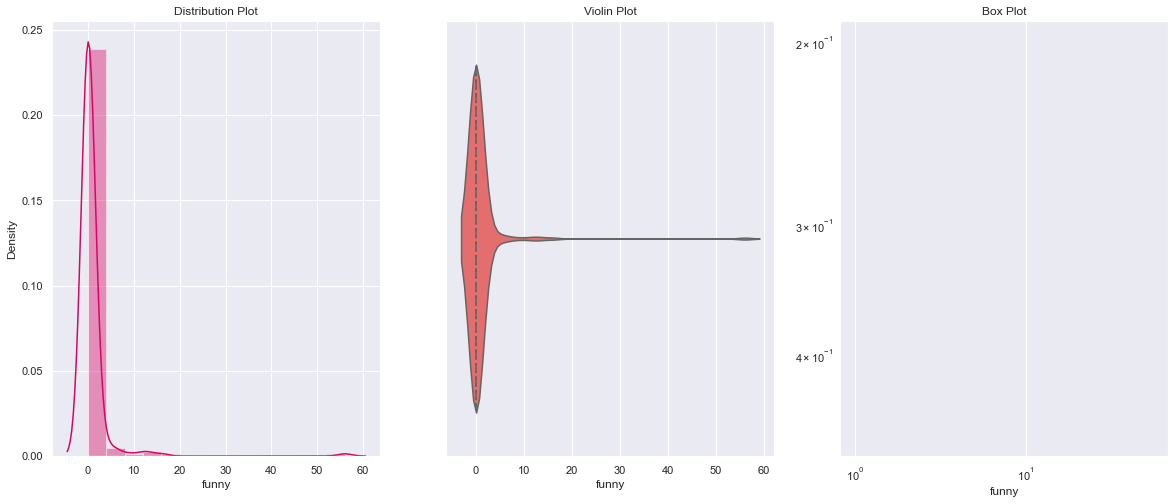

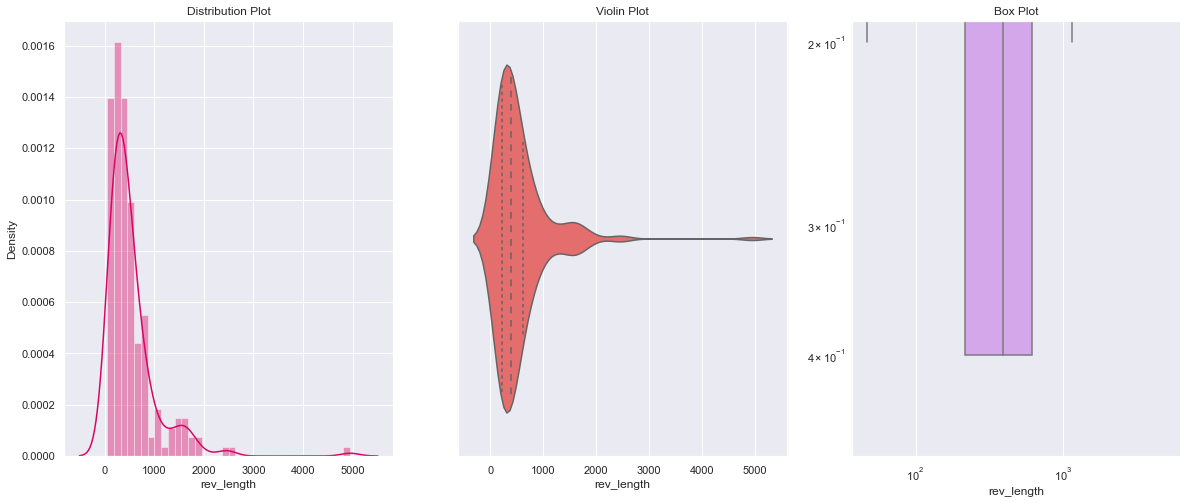

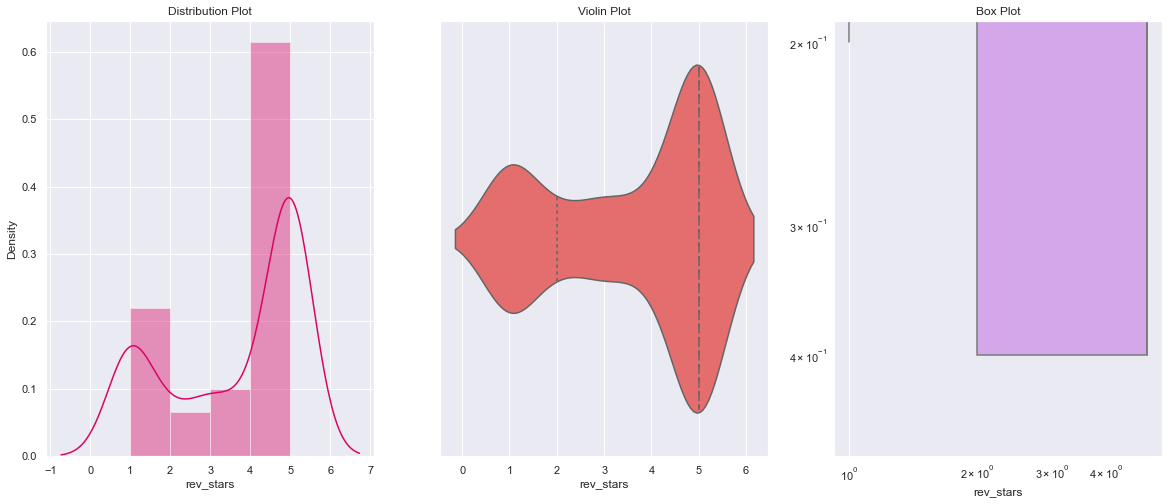

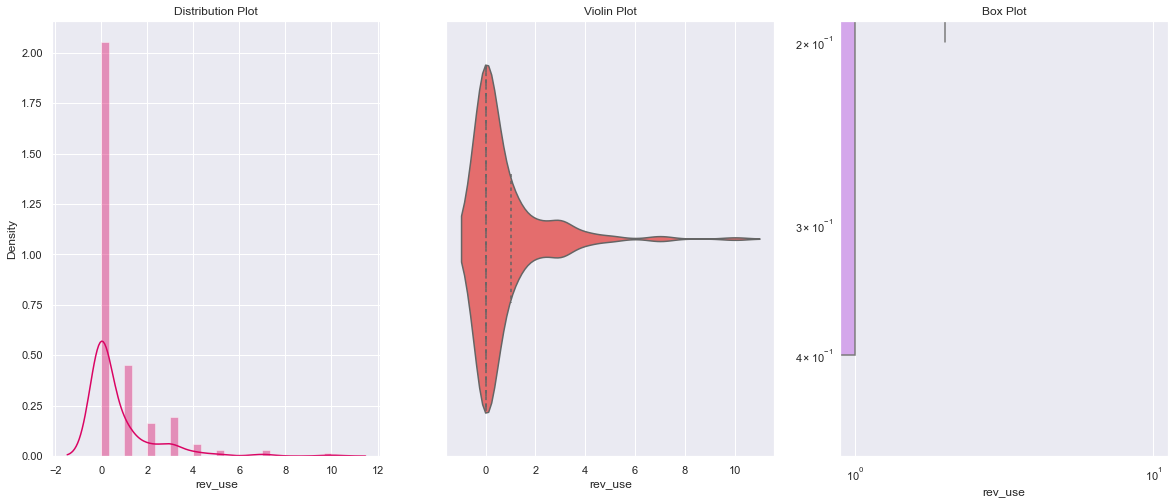

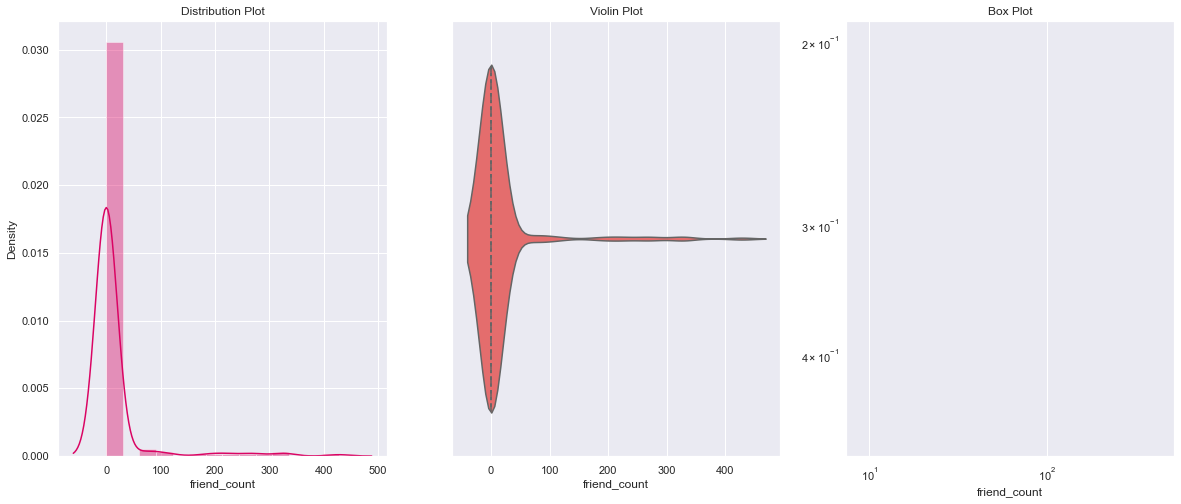

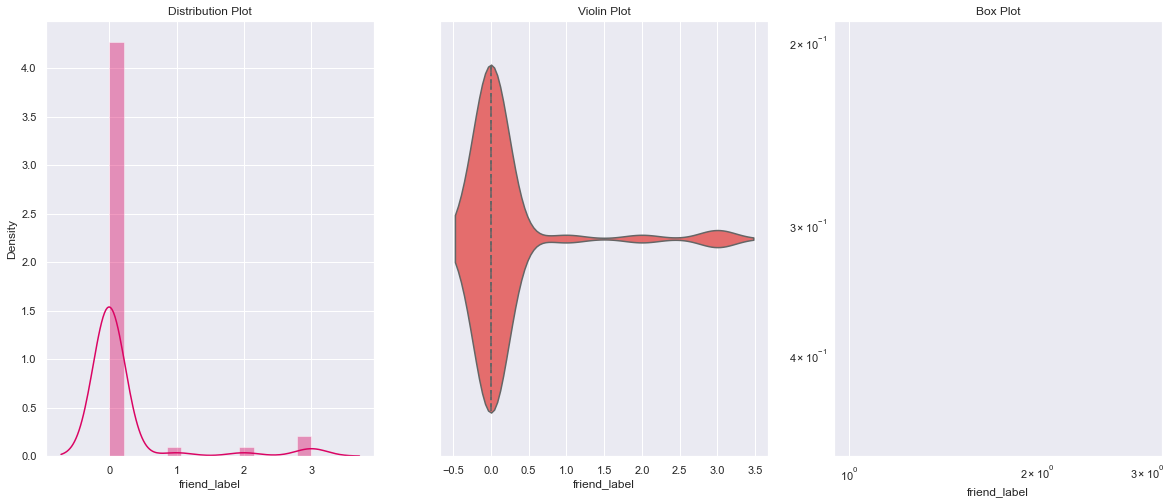

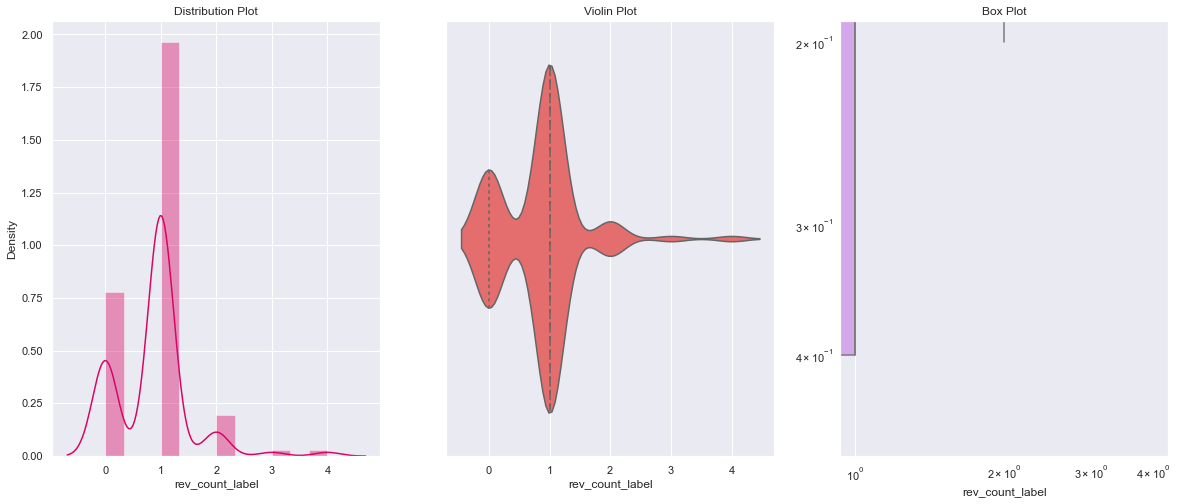

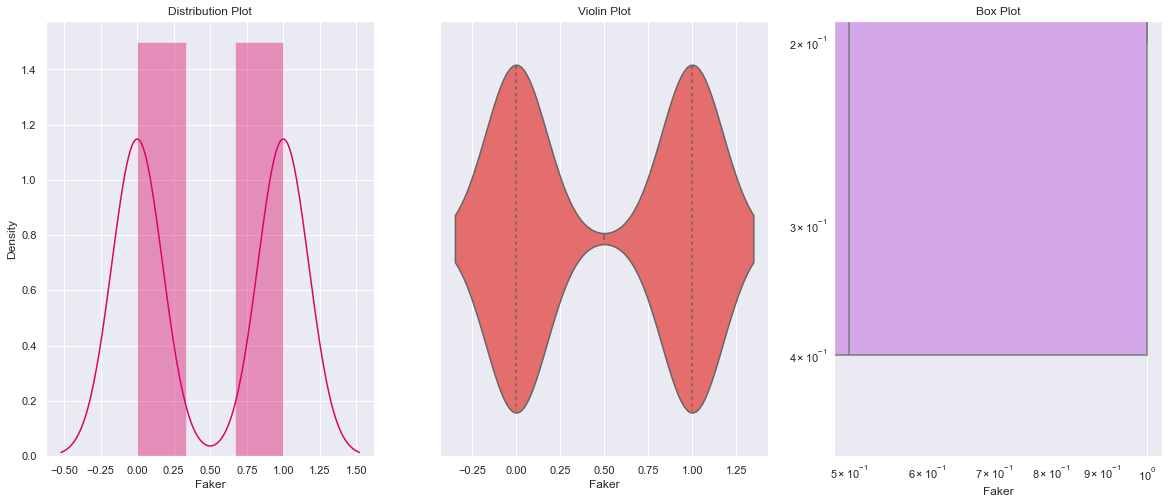

In [14]:
def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df1[col],ax=ax[0], color="#da0463")
        plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df1, x=col,ax=ax[1], inner="quartile", color="#f85959")
        plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df1, x=col,ax=ax[2],orient='v', color="#d89cf6")
        plt.xscale('log')
        plt.yscale('log')
plt.show()

for column in df1.columns:
    if df1[column].dtype != 'object':
        
        uni(df1,column,0)

<h1> Outlier Treatment </h1>

In [15]:
print(color.BOLD+color.PURPLE+'Ouliers in dataset:')

Ouliers in dataset:


In [16]:
list_of_numerics=df1.select_dtypes(include=['float','int32']).columns
types= df1.dtypes
overview= df1.apply(lambda x: [round(x.min()), 
                                 round(x.max()), 
                                 round(x.mean()), 
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= df1.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers})
explo


,Types,Outliers
average_stars,float64,0
review_count,int64,0
compliment_food,int64,0
compliment_stay,int64,0
compliment_service,int64,0
compliment_staff,int64,0
compliment_ambience,int64,0
compliment_hygenie,int64,0
compliment_safety,int64,0
compliment_nature,int64,0


In [18]:
print(color.BOLD+color.PURPLE+'There are no outliers in dataset now:')


There are no outliers in dataset now:


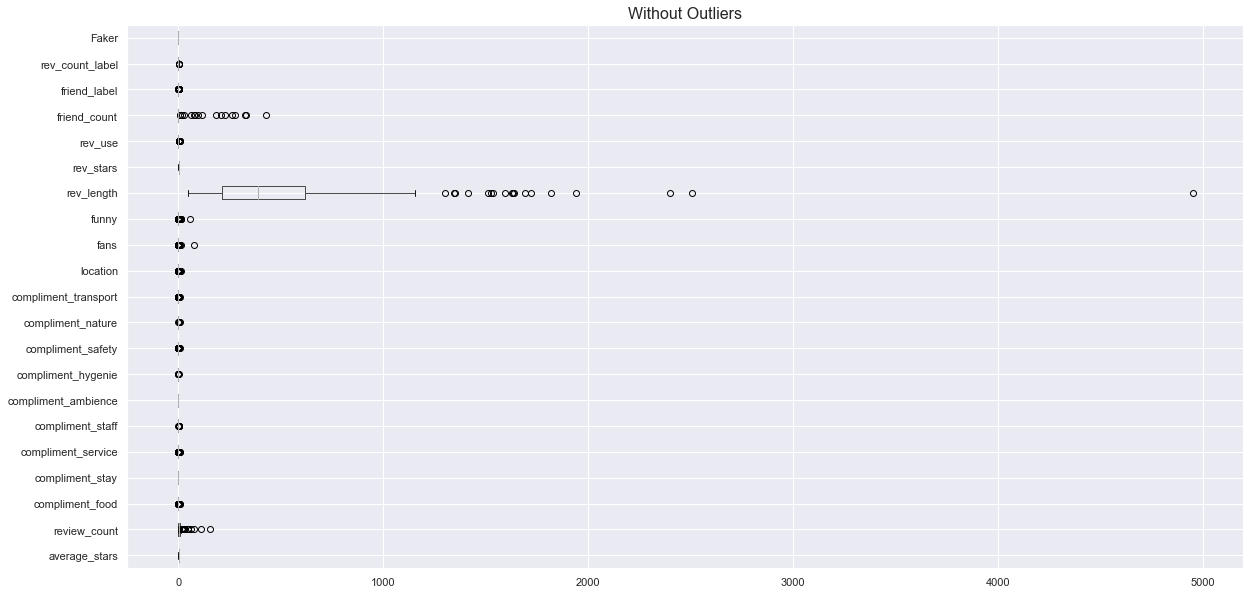

In [19]:
# construct box plot for continuous variables
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='bool')].index
plt.figure(figsize=(20,10))
df1[cont].boxplot(vert=False)
plt.title('Without Outliers',fontsize=16)
plt.show()

<h1> Checking correlations in data </h1>

In [21]:
correlation = df1.corr()

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,average_stars,review_count,compliment_food,compliment_stay,compliment_service,compliment_staff,compliment_ambience,compliment_hygenie,compliment_safety,compliment_nature,compliment_transport,location,fans,funny,rev_length,rev_stars,rev_use,friend_count,friend_label,rev_count_label,Faker
average_stars,1.000000,-0.005812,0.036886,nan,0.036886,0.054308,nan,0.024785,-0.004040,0.042068,0.041887,0.024824,0.069716,-0.068224,-0.196324,0.782263,-0.156682,0.100784,0.103421,-0.004156,-0.072845
review_count,-0.005812,1.000000,0.428153,nan,0.428153,0.457043,nan,0.232865,0.474174,0.163702,0.588847,0.394462,0.054045,0.276858,0.262397,0.033545,0.302520,0.235626,0.263292,0.774094,-0.013237
compliment_food,0.036886,0.428153,1.000000,nan,1.000000,0.769168,nan,0.551812,0.655376,0.652247,0.835432,0.737029,0.095379,0.227550,0.306956,0.102778,0.324429,0.451379,0.500579,0.382391,0.087753
compliment_stay,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
compliment_service,0.036886,0.428153,1.000000,nan,1.000000,0.769168,nan,0.551812,0.655376,0.652247,0.835432,0.737029,0.095379,0.227550,0.306956,0.102778,0.324429,0.451379,0.500579,0.382391,0.087753
compliment_staff,0.054308,0.457043,0.769168,nan,0.769168,1.000000,nan,0.377779,0.389199,0.394396,0.729270,0.604733,0.129533,0.189976,0.408006,0.098112,0.356640,0.540208,0.533170,0.392263,0.088648
compliment_ambience,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
compliment_hygenie,0.024785,0.232865,0.551812,nan,0.551812,0.377779,nan,1.000000,0.746976,-0.012179,0.489622,0.202758,0.054655,0.159559,0.023946,0.024472,0.196144,0.267420,0.301894,0.173869,0.114294
compliment_safety,-0.004040,0.474174,0.655376,nan,0.655376,0.389199,nan,0.746976,1.000000,0.344106,0.638262,0.423413,0.134162,0.279988,0.044903,0.044709,0.129223,0.233523,0.271421,0.331777,0.063628
compliment_nature,0.042068,0.163702,0.652247,nan,0.652247,0.394396,nan,-0.012179,0.344106,1.000000,0.459530,0.693350,0.109035,0.173559,-0.005508,0.083071,0.036195,0.423128,0.378934,0.195326,0.106563


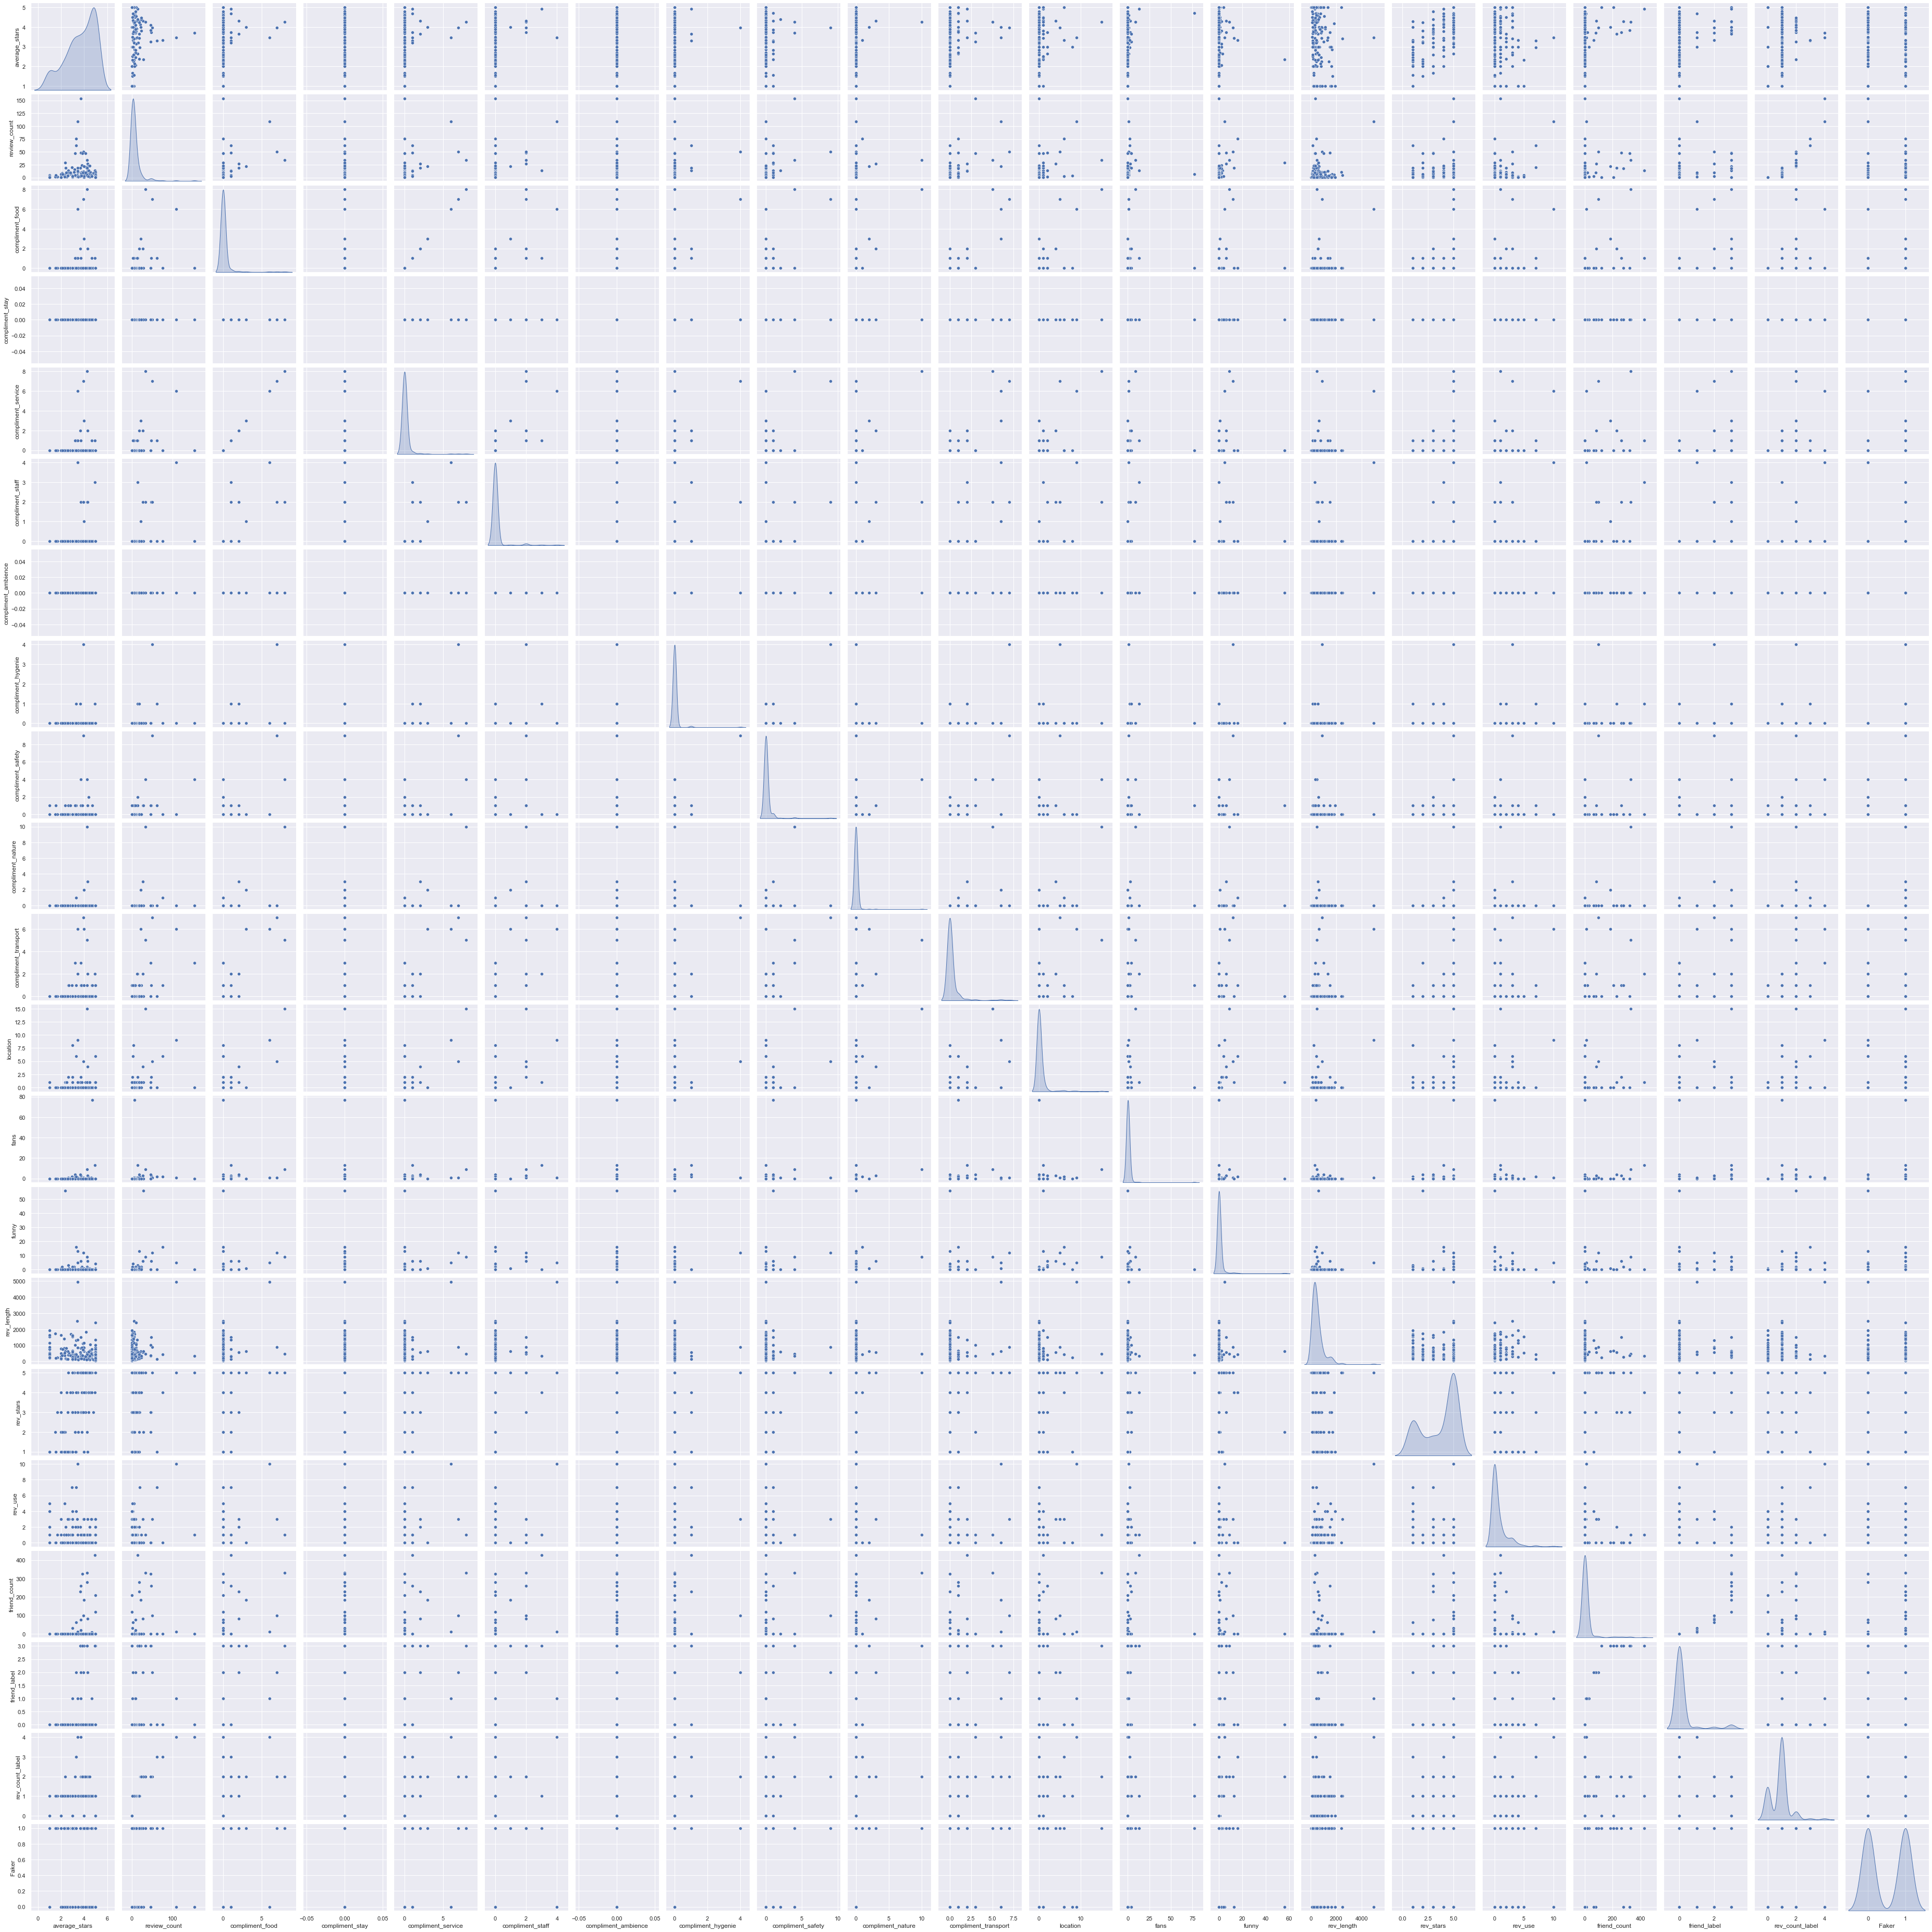

In [22]:
sns.pairplot(df1,diag_kind="kde")
plt.show()

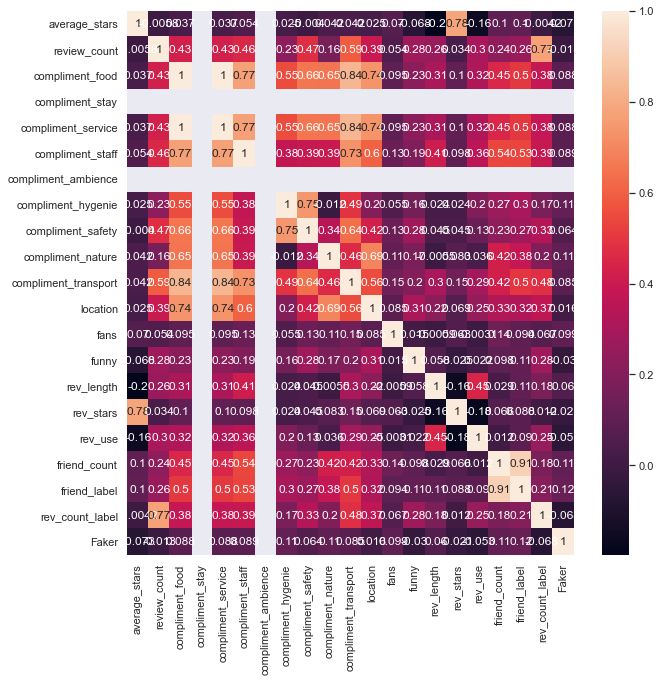

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(df1.corr(), annot = True)
plt.show()


In [24]:
print(color.BOLD+color.PURPLE+'Data has no issue of multicolinearity.')


Data has no issue of multicolinearity.


<h2>Business insights from EDA </h2>

<h1> Model Building </h1>

<h3> Train Test Split </h3>

In [27]:
# Copy all the predictor variables into X dataframe
X = df1.drop('Faker', axis=1)

# Copy target into the y dataframe. 
y = df1['Faker']

In [28]:
print(color.BOLD+color.PURPLE+"Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :


In [29]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',X_test.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (140, 20)
Number of rows and columns of the training set for the dependent variable: (140,)
Number of rows and columns of the test set for the independent variables: (60, 20)
Number of rows and columns of the test set for the dependent variable: (60,)


In [30]:
print(color.BOLD+color.PURPLE+"Duplicate check on dataset :\n")
duplicateRowsDF = X_test[X_test.duplicated()]
duplicateRowsDF.sum()

Duplicate check on dataset :



average_stars           0.0
review_count            0.0
compliment_food         0.0
compliment_stay         0.0
compliment_service      0.0
compliment_staff        0.0
compliment_ambience     0.0
compliment_hygenie      0.0
compliment_safety       0.0
compliment_nature       0.0
compliment_transport    0.0
location                0.0
fans                    0.0
funny                   0.0
rev_length              0.0
rev_stars               0.0
rev_use                 0.0
friend_count            0.0
friend_label            0.0
rev_count_label         0.0
dtype: float64

<h3> Model Building implmeneted through Stacking</h3>
<br> 1. Building Level 0 models :Building different baseline models with 10-fold cross validation.
<br> 2. Model selection : Selecting list of top performing models to be used in stacked ensemble method.
<br> 3. Model Evaluation.
<br> 4. Comparing individiual and stacked model performance.

<h4> Build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method:<h4>

In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='12')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=False)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=False)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [32]:
print(color.BOLD+color.CYAN+'Accuracy')
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

Accuracy
LR_L2: nan (nan)
LDA: 0.578571 (0.041650)
KNN7: 0.542857 (0.088641)
KNN5: 0.507143 (0.057143)
KNN9: 0.578571 (0.094221)
KNN11: 0.557143 (0.100000)
CART: 0.528571 (0.034993)
NB: 0.528571 (0.099488)
SVM Linear: 0.535714 (0.074915)
SVM RBF: 0.457143 (0.111575)
AB: 0.557143 (0.107381)
GBM: 0.592857 (0.036422)
RF_Ent100: 0.614286 (0.041650)
RF_Gini100: 0.600000 (0.026726)
ET100: 0.607143 (0.074915)
ET500: 0.600000 (0.082685)
MLP: 0.564286 (0.082685)
SGD3000: 0.421429 (0.118235)
ET1000: 0.592857 (0.092029)


In [33]:
print(color.BOLD+color.CYAN+'Accuracy')
models = GetBasedModel()
names,results = BasedLine2(X_test, y_test,models)

Accuracy
LR_L2: nan (nan)
LDA: 0.483333 (0.122474)
KNN7: 0.433333 (0.133333)
KNN5: 0.416667 (0.117851)
KNN9: 0.416667 (0.091287)
KNN11: 0.450000 (0.124722)
CART: 0.583333 (0.052705)
NB: 0.433333 (0.161589)
SVM Linear: 0.483333 (0.161589)
SVM RBF: 0.566667 (0.161589)
AB: 0.533333 (0.084984)
GBM: 0.533333 (0.113039)
RF_Ent100: 0.533333 (0.100000)
RF_Gini100: 0.516667 (0.081650)
ET100: 0.533333 (0.145297)
ET500: 0.566667 (0.133333)
MLP: 0.516667 (0.192931)
SGD3000: 0.416667 (0.149071)
ET1000: 0.533333 (0.145297)


In [54]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_test_pred_rfe = rf_ent.predict(X_test)

In [35]:
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [36]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et100 = et_100.predict(X_test)

In [37]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

In [38]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [39]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [40]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [41]:
knn_5 = KNeighborsClassifier(5)
knn_5.fit(X_train,y_train)
y_pred_knn5 = knn_5.predict(X_test)

In [42]:
knn_7 = KNeighborsClassifier(7)
knn_7.fit(X_train,y_train)
y_pred_knn7 = knn_7.predict(X_test)

In [43]:
svm_RBF= SVC(kernel='rbf',gamma='auto',probability=True)
svm_RBF.fit(X_train,y_train)
y_pred_svm_RBF = svm_RBF.predict(X_test)

In [44]:
sgd= SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

<h4>Model selection : Selecting list of top performing models to be used in stacked ensemble method</h4>

In [45]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
	KNeighborsClassifier(5),
	KNeighborsClassifier(7),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    SGDClassifier(max_iter=1000, tol=1e-4),
	SVC(kernel='rbf',gamma='auto',probability=True),
    SVC(kernel='linear',gamma='auto',probability=True),
	SGDClassifier(max_iter=1000, tol=1e-4),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [46]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [16]

model  0:     [RandomForestClassifier]
    fold  0:  [0.60714286]
    fold  1:  [0.67857143]
    fold  2:  [0.64285714]
    fold  3:  [0.53571429]
    fold  4:  [0.46428571]
    ----
    MEAN:     [0.58571429] + [0.07693093]
    FULL:     [0.58571429]

model  1:     [RandomForestClassifier]
    fold  0:  [0.60714286]
    fold  1:  [0.57142857]
    fold  2:  [0.60714286]
    fold  3:  [0.57142857]
    fold  4:  [0.50000000]
    ----
    MEAN:     [0.57142857] + [0.03912304]
    FULL:     [0.57142857]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.64285714]
    fold  1:  [0.50000000]
    fold  2:  [0.53571429]
    fold  3:  [0.53571429]
    fold  4:  [0.46428571]
    ----
    MEAN:     [0.53571429] + [0.05976143]
    FULL:     [0.53571429]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.50000000]
    fold  1:  [0.50000000]
    fold  2:  [0.607142

In [47]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=recall_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [16]

model  0:     [RandomForestClassifier]
    fold  0:  [0.46153846]
    fold  1:  [0.61538462]
    fold  2:  [0.53846154]
    fold  3:  [0.38461538]
    fold  4:  [0.50000000]
    ----
    MEAN:     [0.50000000] + [0.07692308]
    FULL:     [0.50000000]

model  1:     [RandomForestClassifier]
    fold  0:  [0.53846154]
    fold  1:  [0.61538462]
    fold  2:  [0.46153846]
    fold  3:  [0.46153846]
    fold  4:  [0.50000000]
    ----
    MEAN:     [0.51538462] + [0.05756396]
    FULL:     [0.51515152]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.46153846]
    fold  1:  [0.46153846]
    fold  2:  [0.15384615]
    fold  3:  [0.38461538]
    fold  4:  [0.35714286]
    ----
    MEAN:     [0.36373626] + [0.11283954]
    FULL:     [0.36363636]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.46153846]
    fold  1:  [0.46153846]
    fold  2:  [0.23076923

In [48]:
# initializing generalizer model i.e., MLP classifier in our case
model = ExtraTreesClassifier(n_estimators= 500)
    
model = model.fit(S_train, y_train)
y_pred_test = model.predict(S_test)
print(color.BOLD+color.PURPLE+'Final Test Accuracy score: [%.8f]' % accuracy_score(y_test, y_pred_test))
print(color.BOLD+color.PURPLE+'Final Test Recall score: [%.8f]' % recall_score(y_test, y_pred_test))

Final Test Accuracy score: [0.56666667]
Final Test Recall score: [0.55882353]


In [49]:
# initializing generalizer model i.e., MLP classifier in our case
model = ExtraTreesClassifier(n_estimators= 500)
    
model = model.fit(S_train, y_train)
y_pred_train = model.predict(S_train)
print(color.BOLD+color.PURPLE+'Final Train Accuracy score: [%.8f]' % accuracy_score(y_test, y_pred_test))
print(color.BOLD+color.PURPLE+'Final Train Recall score: [%.8f]' % recall_score(y_test, y_pred_test))

Final Train Accuracy score: [0.56666667]
Final Train Recall score: [0.55882353]


<h4> Model Evaluation</h4>

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.566667,0.633333,0.558824,0.576923,0.59375,0.567873,14.96695,0.134535


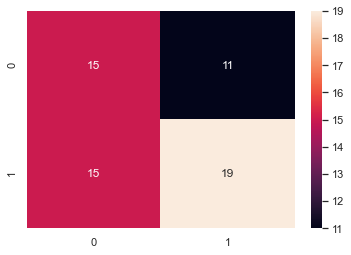

In [50]:
CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_test)
acc= accuracy_score(y_test, y_pred_test)
roc=roc_auc_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

mathew = matthews_corrcoef(y_test, y_pred_test)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.892857,0.918033,0.848485,0.932432,0.88189,0.890459,3.700612,0.786166


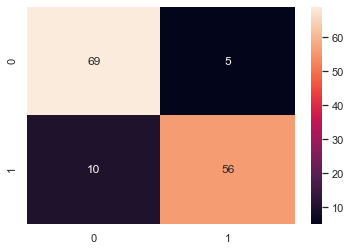

In [51]:
CM=confusion_matrix(y_train,y_pred_train)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_train, y_pred_train)
acc= accuracy_score(y_train, y_pred_train)
roc=roc_auc_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

mathew = matthews_corrcoef(y_train, y_pred_train)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

<h4>Model Performace Comparison</h4>

In [52]:
data = {'Random Forest Entropy': y_test_pred_rfe,
        'Random Forest gini': y_pred_rfe,
        'KNN_5':y_pred_knn5,
        'KNN_7':y_pred_knn7,
        'SVM':y_pred_svm_RBF,
        'SGD':y_pred_sgd,
                'EXtra tree classifier': y_pred_et500,       
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm ,
               }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.892857,0.918033,0.848485,0.932432,0.881890,0.890459,3.700612,0.786166
1,Random Forest Entropy,0.566667,0.700000,0.411765,0.769231,0.518519,0.590498,14.966883,0.190261
2,Random Forest gini,0.583333,0.736842,0.411765,0.807692,0.528302,0.609729,14.391223,0.233780
3,KNN_5,0.500000,0.611111,0.323529,0.730769,0.423077,0.527149,17.269481,0.058716
4,KNN_7,0.450000,0.523810,0.323529,0.615385,0.400000,0.469457,18.996460,-0.063464
5,SVM,0.416667,0.461538,0.176471,0.730769,0.255319,0.453620,20.147713,-0.111575
6,SGD,0.433333,0.000000,0.000000,1.000000,0.000000,0.500000,19.571973,0.000000
7,EXtra tree classifier,0.550000,0.684211,0.382353,0.769231,0.490566,0.575792,15.542529,0.161477
8,Adaboost,0.483333,0.555556,0.441176,0.538462,0.491803,0.489819,17.845194,-0.020282
9,CART,0.566667,0.642857,0.529412,0.615385,0.580645,0.572398,14.966936,0.143823


In [81]:
print('Random Forest Accuracy',metrics.roc_auc_score(y_test,y_test_pred_rfe))
print('Random Forest gini',metrics.roc_auc_score(y_test,y_pred_rfe))
print('KNN_5',metrics.roc_auc_score(y_test,y_pred_knn5))
print('KNN_7',metrics.roc_auc_score(y_test,y_pred_knn7))
print('SVM',metrics.roc_auc_score(y_test,y_pred_svm_RBF))
print('SGD',metrics.roc_auc_score(y_test,y_pred_sgd))
print('SVM_',metrics.roc_auc_score(y_test,y_pred_svm_RBF))
print('EXtra tree classifier',metrics.roc_auc_score(y_test,y_pred_et500))
print('Adaboost',metrics.roc_auc_score(y_test,y_pred_sgd))
print('CART',metrics.roc_auc_score(y_test,y_pred_svm_RBF))
print('GBM',metrics.roc_auc_score(y_test,y_pred_gbm))
print('Stacked Classifier',metrics.roc_auc_score(y_test,y_pred_test))


Random Forest Accuracy 0.6244343891402715
Random Forest gini 0.6097285067873303
KNN_5 0.5271493212669683
KNN_7 0.46945701357466063
SVM 0.4536199095022625
SGD 0.5
SVM_ 0.4536199095022625
EXtra tree classifier 0.5757918552036198
Adaboost 0.5
CART 0.4536199095022625
GBM 0.5237556561085973
Stacked Classifier 0.5678733031674208


In [83]:
RFGtestfpr, RFGtesttpr, RFGtestthresholds =metrics.roc_curve(y_test,y_pred_rfe)
RFEtestfpr, RFEtesttpr, RFEtestthresholds =metrics.roc_curve(y_test,y_pred_rfe)
KNN_5testfpr, KNN_5testtpr, KNN_5testthresholds =metrics.roc_curve(y_test,y_pred_knn5)
KNN_7testfpr, KNN_7testtpr, KNN_7testthresholds =metrics.roc_curve(y_test,y_pred_knn7)
SGDtestfpr, SGDtesttpr, SGDtestthresholds =metrics.roc_curve(y_test,y_pred_sgd)
SVMtestfpr, SVMtesttpr, SVMtestthresholds =metrics.roc_curve(y_test,y_pred_svm_RBF)
ETtestfpr, ETtesttpr, ETtestthresholds =metrics.roc_curve(y_test,y_pred_et500)
Adaboosttestfpr, Adaboosttesttpr, Adaboosttestthresholds =metrics.roc_curve(y_test,y_pred_sgd)
CARTtestfpr, CARTtesttpr, CARTtestthresholds =metrics.roc_curve(y_test,y_pred_svm_RBF)
GBMtestfpr, GBMtesttpr, GBMtestthresholds =metrics.roc_curve(y_test,y_pred_gbm)
SCtestfpr, SCtesttpr, SCtestthresholds =metrics.roc_curve(y_test,y_pred_test)


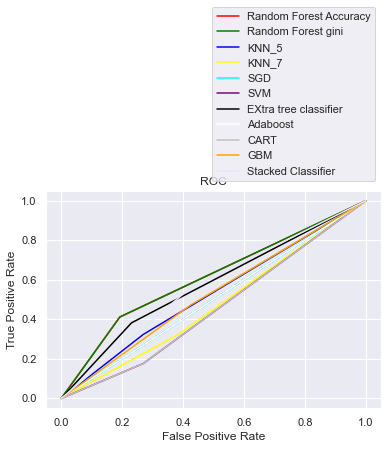

In [84]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(RFGtestfpr, RFGtesttpr,color='red',label="Random Forest Accuracy")
plt.plot(RFEtestfpr, RFEtesttpr,color='green',label="Random Forest gini")
plt.plot(KNN_5testfpr, KNN_5testtpr,color='blue',label="KNN_5")
plt.plot(KNN_7testfpr, KNN_7testtpr,color='yellow',label="KNN_7")
plt.plot(SGDtestfpr, SGDtesttpr,color='cyan',label="SGD")
plt.plot(SVMtestfpr, SVMtesttpr,color='purple',label="SVM")
plt.plot(ETtestfpr, ETtesttpr,color='black',label="EXtra tree classifier")
plt.plot(Adaboosttestfpr, Adaboosttesttpr,color='white',label="Adaboost")
plt.plot(CARTtestfpr, CARTtesttpr,color='silver',label="CART")
plt.plot(GBMtestfpr, GBMtesttpr,color='orange',label="GBM")
plt.plot(SCtestfpr, SCtesttpr,color='lavender',label="Stacked Classifier")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

<h2> Conclusion:</h2>To identify fake and unfake reviews , multiple algorithms were implemented namely Random Forest Accuracy,Random Forest gini.
    KNN-5,KNN-7,SVM,Stochastic Gradient Classifier, EXtra tree classifier, AdaBoost, Decision Tree, Gradient Boost and Stacked Classifier'
    Out of all the algorithms, Stacked classifer has given the best results in terms of accuracy, precision , recall and f1-score. Thus
    this is the best model to solve this problem 